# Sampling the von-Mises-Fisher Distribution in $p$ dimensions

In this notebook we implement functions to calculate and sample from the von Mises-Fisher distribution [1]. Moreover, we also implement a few simple functions to visualise the samples from this distribution. 

## Introduction 


The von Mises-Fisher distribution is the natural extension of the von Mises distribution on the unit circle $\mathbb{S}^{1}$ to the hypersphere $\mathbb{S}^{p-1}$. A unit hyper-sphere $\mathbb{S}^{p-1}$ can be considered 
to be embedded in $p$-dimensional Euclidean space $\mathbb{R}^{p}$, e.g., the simplest example being the unit 
circle which is denoted $\mathbb{S}^{1}$ and is embedded in $\mathbb{R}^{2}$. The next simplest example would
be the unit sphere denoted $\mathbb{S}^{2}$, embedded in $\mathbb{R}^{3}$ and so on.

If one considers the natural logarithm of the von Mises probability density function $p(\theta; \mu,\kappa)$, 
then it becomes clear how it should be generalised to higher dimensions. As discussed in Ref. [1],
if one takes the natural logarithm of the von Mises distribution it is found to be linear in a unit random vector.
This is now demonstrated, 

\begin{eqnarray}
\log p(\theta; \mu,\kappa) & = & \kappa \cos (\theta - \mu) - \log I_{0}(\kappa) - \log 2\pi \\
& = & \kappa \boldsymbol{\mu}^{\top} \mathbf{x} - \log I_{0}(\kappa) - \log 2\pi \ ,
\end{eqnarray}

where we have defined two unit vectors $\boldsymbol{\mu}$ and $\mathbf{x}$ such that

\begin{equation}
\boldsymbol{\mu} = (\cos\mu,\sin\mu)^{\top} \quad , \quad \mathbf{x} = (\cos\theta,\sin\theta)^{\top}
\end{equation}

and we have used the following trignometric identity 

\begin{equation}
\cos(A+B) = \cos A \cos B + \sin A \sin B \ .
\end{equation}



From this we see that the appropriate generalisation to the ($p-1$)-dimensional hypersphere has a log density linear in $\mathbf{x}$. The $(p-1)$-dimension von Mises-Fisher probability density function for a unit random vector $\mathbf{x}\in \mathbb{S}^{p-1} \subset \mathbb{R}^{p}$ is 

\begin{equation}
f(\mathbf{x}; \boldsymbol{\mu},\kappa) 
= \left( \frac{\kappa}{2} \right)^{p/2 - 1}
\frac{1}{\Gamma(p/2)I_{p/2 -1}(\kappa)} \exp \left(\kappa \boldsymbol{\mu}^{\top}\mathbf{x}\right)
\equiv C_{p}(\kappa) \exp \left(\kappa \boldsymbol{\mu}^{\top}\mathbf{x}\right)
\end{equation}

where 

- $\kappa\geq 0$ is the concentration
- $\boldsymbol{\mu}$ is the mean direction and is a unit vector ($\Vert \boldsymbol{\mu}\Vert = 1$)  
- $\mathbf{x}$ is the random unit vector 
- $I_{\nu}(\kappa)$ is the modified Bessel function of the first kind of order $\nu = p/2 - 1$ 
- $C_{p}(\kappa)$ is the normalisation coefficient which can be shown to be dependent only on $\kappa$ and the dimension $p$

A few observations: 

- the distribution is rotationally symmetric about $\boldsymbol{\mu}$ 
- If $O$ is an orthogonal transformation ($O^{\top}O = 1$), then 
\begin{equation}
f(O\mathbf{x}; O\boldsymbol{\mu},\kappa) 
= C_{p}(\kappa) \exp \left(\kappa (O\boldsymbol{\mu})^{\top}(O\mathbf{x})\right)
= C_{p}(\kappa) \exp \left(\kappa \boldsymbol{\mu}^{\top}O^{\top}O\mathbf{x}\right)
= C_{p}(\kappa) \exp \left(\kappa \boldsymbol{\mu}^{\top}\mathbf{x}\right)
= f(\mathbf{x}; \boldsymbol{\mu},\kappa)
\end{equation}

- A useful property is that under multiplication 

\begin{equation}
f(\mathbf{x}; \boldsymbol{\mu}_{1},\kappa_{1}) f(\mathbf{x}; \boldsymbol{\mu}_{2},\kappa_{2})  =f(\mathbf{x}; \boldsymbol{\mu},\kappa) 
\end{equation}
where 
\begin{equation}
\boldsymbol{\mu} = \frac{\kappa_{1}\boldsymbol{\mu}_{1} + \kappa_{2}\boldsymbol{\mu}_{2} }{\Vert \kappa_{1}\boldsymbol{\mu}_{1} + \kappa_{2}\boldsymbol{\mu}_{2} \Vert} \quad . 
\end{equation}

and 
\begin{equation}
\kappa = \Vert \kappa_{1}\boldsymbol{\mu}_{1} + \kappa_{2}\boldsymbol{\mu}_{2} \Vert 
\end{equation}

- as $\kappa\to \infty$ the clustering about the mean direction $\boldsymbol{\mu}$ increases


A few special cases: 

- $\kappa=0$ it is the uniform distribution on the $(p-1)$-dimensional hypersphere 

- In the case of the unit sphere the normalisation coefficient simplifies to 
\begin{equation}
C_{3}(\kappa) = \frac{\kappa}{\sinh\kappa}
\end{equation}


The unit random vector $\mathbf{x}$ can be decomposed using a tangent-normal decomposition, i.e., components tangent to and perpendicular to the mean direction such that  

\begin{eqnarray}
\mathbf{x} 
& = & (\mathbf{x}\cdot \boldsymbol{\mu}) \boldsymbol{\mu} + (\mathbf{x} - (\mathbf{x}\cdot \boldsymbol{\mu}) \boldsymbol{\mu})\\
& = & t \boldsymbol{\mu} + (I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}\\
& = & t \boldsymbol{\mu} + \Vert (I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}\Vert \frac{(I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}}{\Vert (I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}\Vert}\\
& = & t \boldsymbol{\mu} + \sqrt{1-t^{2}} \boldsymbol{\xi} \quad ,
\end{eqnarray}
where
- $t\equiv \mathbf{x}\cdot \boldsymbol{\mu}$,
- $I_{p}$ is the p-dimensional identity matrix,
- $\boldsymbol{\xi} = \frac{(I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}}{\Vert (I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}\Vert}$  such that $\boldsymbol{\xi}$ is normal to $\boldsymbol{\mu}$,
-  and we have used pythagorus' theorem ($a^{2} + b^{2} = c^{2}$)
\begin{equation}
1= \Vert x \Vert^{2} = \Vert (I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top})\mathbf{x}\Vert^{2} + \Vert t \boldsymbol{\mu}\Vert^{2}  =  \Vert I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top}\Vert^{2}\Vert\mathbf{x}\Vert^{2} + t^{2} \Vert \boldsymbol{\mu}\Vert^{2} 
=\Vert I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top}\Vert^{2} + t^{2}\\
\end{equation}
which leads us to 
\begin{equation}
\Vert I_{p} - \boldsymbol{\mu}\boldsymbol{\mu}^{\top}\Vert = \sqrt{1-t^{2}} \quad .
\end{equation}


In the tangent-normal decomposition we see that $t$ is invariant under rotation about $\boldsymbol{\mu}$, because 
it is parallel to $\boldsymbol{\mu}$, while $\boldsymbol{\xi}$ transforms as $\boldsymbol{\xi}\mapsto O\boldsymbol{\xi}$. Thus the conditional distribution of $\boldsymbol{\xi}\vert t$ is uniform on $\mathbb{S}^{p-2}$ [1]. It therefore follows that [1]

- $\boldsymbol{\xi}$ and $t$ are independent  
- $\boldsymbol{\xi}$ is uniform on $\mathbb{S}^{p-2}$ 

To visualise what is happening here. Consider the following diagram for the dimension $p=3$. 


            

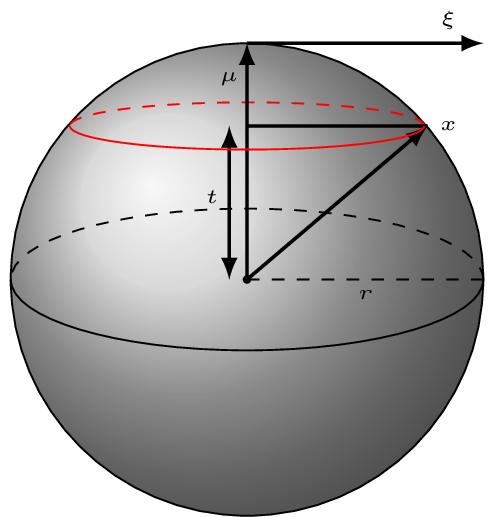

In [1]:
from wand.image import Image as WImage
# LaTeX image drawn using TikZ is given pdf and ps formats
img = WImage(filename='./tangent-normal-decomp.ps', resolution=300) 
img

In [2]:
type(img)

wand.image.Image

In [3]:
img.format # postscript

'PS'

In [4]:
# Convert to jpeg for blog
with WImage(filename='./tangent-normal-decomp.ps', resolution=500) as img:
    img.format = 'jpeg'
    img.save(filename='./tangent-normal-decomp.jpg')


It can be seen that a rotation of $\mathbf{x}$ about $\boldsymbol{\mu}$ decomposed into components parallel 
and perpendicular to $\boldsymbol{\mu}$ results in no change in $t$, however, the vector $\boldsymbol{\xi}$ 
sweeps out a unit circle ($\mathbb{S}^{p-2} = \mathbb{S}^{3-2} = \mathbb{S}^{1}$).

## Simulation

Ulrich in 1984 [2] gave an algorithm to sample the von Mises-Fisher distribution, which was later improved upon 
by Wood in 1994 [3]. From the above considerations it is obvious that a von Mises-Fisher sample can be simulated by 

- generating $\boldsymbol{\xi}$ from the uniform distribution on $\mathbb{S}^{p-2}$ 
- generating $t$ on the interval $[-1,1]$ from the marginal distribution, which can be shown to be [1]

\begin{equation}
\left(\frac{\kappa}{2} \right)^{p/2 -1}
\frac{1}{\Gamma(\frac{p-1}{2})\Gamma(\frac{1}{2}) I_{\frac{p-1}{2}}(\kappa)} 
e^{\kappa t} (1-t^{2})^{\frac{p-3}{2}}
\end{equation}

- and then combining them using $\mathbf{x} = t \boldsymbol{\mu} + \sqrt{1-t^{2}} \boldsymbol{\xi}$ to produce pseudo-random unit vectors with a von Mises-Fisher distribution

Sampling the uniform distribution on a unit hyper-sphere is relatively simple and can be done a number of different
ways [4]. We will use an algorithm proposed by Muller in 1959 [5]. This algorithm requires sampling of the 
normal distribution in the appropriate dimension ($(p,1)$ for one sample) and creating a unit vector out of these samples.


To sample the marginal distribution of $t$ we will follow the Ulrich [2] and Wood [3] and use rejection sampling. We will simply state the algorithm we will use to sample the von Mises-Fisher distribution and refer the interested 
reader to [2], [3], and [6] for the further details regarding the derivation of the algorithm.

To simplify the algorithm we will simulate the von Mises-Fisher samples for a chosen $\kappa$ and the mean direction 
$\boldsymbol{\mu} = [ 1 0 0 0 \ldots 0 ]^{\top}$. Afterwhich, we will then rotate to the desired $\boldsymbol{\mu}$.


### Algorithm 

1. $p \leftarrow$ length of $\boldsymbol{\mu}$

2. Sample the $t$ marginal distribution 

    1. $b \leftarrow \frac{(p-1)}{2\kappa + \sqrt{4\kappa^{2} + (p-1)^{2}}}$
    
    2. $x_{0} \leftarrow \frac{1-b}{1+b}$
    
    3. $c \leftarrow \kappa x_{0} + (p-1) \log(1-x_{0}^{2})$ 
    
    4. for i = 1 to N  // Rejection sampling for $N$ samples. 
    
        - while $\kappa W + (p-1) \log(1-x_{0} W) - c < \log(U)$
        
            - $Z \leftarrow$ sample Beta distribution $B(\frac{p-1}{2},\frac{p-1}{2})$ 
            
            - $U \leftarrow$ sample the uniform distribution on $[0,1]$
            
            - $W \leftarrow \frac{1- (1+b)Z}{1- (1-b)Z}$
            
3. $\boldsymbol{\xi} \leftarrow$ sample uniform distribution on the sphere $\mathbb{S}^{p-2}$

    1. $s \leftarrow$ sample the standard normal distribution returning an array of shape $(N,p)$
    
    2. $\boldsymbol{\xi} \leftarrow$ normalised s such that $\boldsymbol{\xi}(i,:) = s(i,:) / \Vert s(i,:) \Vert$
    
4. Samples$(:,0) = t$  // Component parallel to the mean direction $\boldsymbol{\mu} = [ 1 0 0 0 \ldots 0 ]^{\top}$

5. Samples$(:,1:) = \sqrt{1- t^{2}}$ // Components orthogonal to the mean direction $\boldsymbol{\mu} = [ 1 0 0 0 \ldots 0 ]^{\top}$

6. We now have $N$ samples from the von Mises-Fisher distribution with  mean direction $\boldsymbol{\mu} = [ 1 0 0 0 \ldots 0 ]^{\top}$ and concentration $\kappa$. All that remains is to rotate each sample to the desired mean direction.
        

## Implementation 

### Imports 

In [5]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy.matlib
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

### Formatting options 

In [6]:
fs = 16

### Sampling the uniform distribution on a $p$-dimensional hyper-sphere

In [7]:
def rand_uniform_hypersphere(N,p):
    
    """ 
        rand_uniform_hypersphere(N,p)
        =============================
    
        Generate random samples from the uniform distribution on the (p-1)-dimensional 
        hypersphere $\mathbb{S}^{p-1} \subset \mathbb{R}^{p}$. We use the method by 
        Muller [1], see also Ref. [2] for other methods.
        
        INPUT:  
        
            * N (int) - Number of samples 
            * p (int) - The dimension of the generated samples on the (p-1)-dimensional hypersphere.
                - p = 2 for the unit circle $\mathbb{S}^{1}$
                - p = 3 for the unit sphere $\mathbb{S}^{2}$
            Note that the (p-1)-dimensional hypersphere $\mathbb{S}^{p-1} \subset \mathbb{R}^{p}$ and the 
            samples are unit vectors in $\mathbb{R}^{p}$ that lie on the sphere $\mathbb{S}^{p-1}$.
    
    References:
    
    [1] Muller, M. E. "A Note on a Method for Generating Points Uniformly on N-Dimensional Spheres."
    Comm. Assoc. Comput. Mach. 2, 19-20, Apr. 1959.
    
    [2] https://mathworld.wolfram.com/SpherePointPicking.html
    
    """
    
    if (p<=0) or (type(p) is not int):
        raise Exception("p must be a positive integer.")
    
    # Check N>0 and is an int
    if (N<=0) or (type(N) is not int):
        raise Exception("N must be a non-zero positive integer.")
    
    v = np.random.normal(0,1,(N,p))
    
#    for i in range(N):
#        v[i,:] = v[i,:]/np.linalg.norm(v[i,:])
        
    v = np.divide(v,np.linalg.norm(v,axis=1,keepdims=True))
    
    return v

Consider the special case of the unit circle ( $p=2$ )

In [8]:
data = rand_uniform_hypersphere(N=50,p=2)

In [9]:
np.shape(data)

(50, 2)

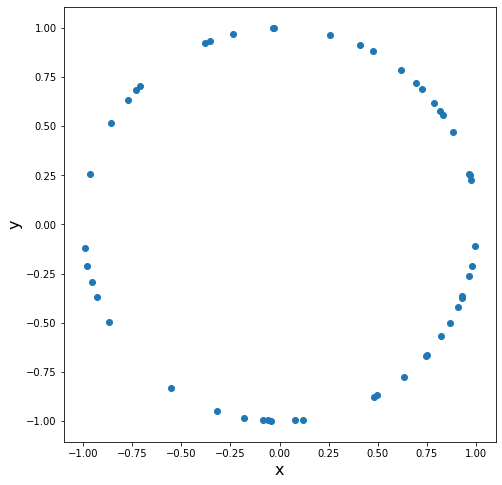

In [10]:
# Scatter plot of samples 
fig = plt.figure(figsize=(10,8))
plt.scatter(data[:,0],data[:,1])

# Make aspect square
ax = plt.gca() 
ax.set_aspect('equal')

# Labels 
ax.set_xlabel('x',fontsize=fs)
ax.set_ylabel('y',fontsize=fs);

# Save it
plt.savefig("uniform-sphere-p-2-scatter.png")

Consider the case of unit sphere ( $p=3$ )

In [11]:
data3D = rand_uniform_hypersphere(N=1000,p=3) 

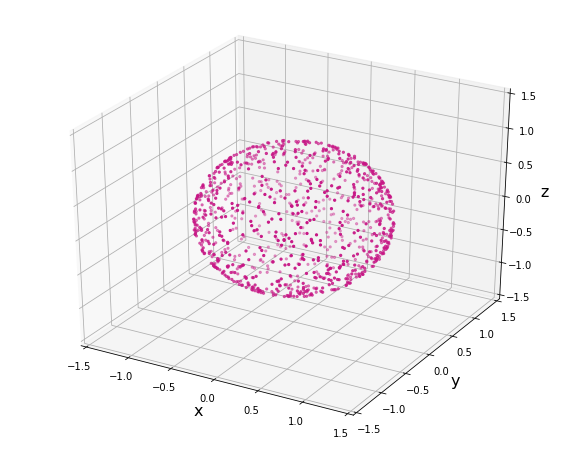

In [12]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(data3D[:,0],data3D[:,1],data3D[:,2],s=5,c='mediumvioletred')

# Labels 
ax.set_xlabel('x',fontsize=fs)
ax.set_ylabel('y',fontsize=fs);
ax.set_zlabel('z',fontsize=fs)

# Limits 
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

# View (use if inline plots are used)
#ax.view_init(20, 50)

# Save it
plt.savefig("uniform-sphere-p-3-scatter.png")

### Sampling the marginal distribution of $t$ using rejections sampling 

In [13]:
def rand_t_marginal(kappa,p,N=1):
    """
        rand_t_marginal(kappa,p,N=1)
        ============================
        
        Samples the marginal distribution of t using rejection sampling of Wood [3]. 
    
        INPUT: 
        
            * kappa (float) - concentration        
            * p (int) - The dimension of the generated samples on the (p-1)-dimensional hypersphere.
                - p = 2 for the unit circle $\mathbb{S}^{1}$
                - p = 3 for the unit sphere $\mathbb{S}^{2}$
            Note that the (p-1)-dimensional hypersphere $\mathbb{S}^{p-1} \subset \mathbb{R}^{p}$ and the 
            samples are unit vectors in $\mathbb{R}^{p}$ that lie on the sphere $\mathbb{S}^{p-1}$.
            * N (int) - number of samples 
        
        OUTPUT: 
        
            * samples (array of floats of shape (N,1)) - samples of the marginal distribution of t
    """
    
    # Check kappa >= 0 is numeric 
    if (kappa < 0) or ((type(kappa) is not float) and (type(kappa) is not int)):
        raise Exception("kappa must be a non-negative number.")
        
    if (p<=0) or (type(p) is not int):
        raise Exception("p must be a positive integer.")
    
    # Check N>0 and is an int
    if (N<=0) or (type(N) is not int):
        raise Exception("N must be a non-zero positive integer.")
    
    
    # Start of algorithm 
    b = (p - 1.0) / (2.0 * kappa + np.sqrt(4.0 * kappa**2 + (p - 1.0)**2 ))    
    x0 = (1.0 - b) / (1.0 + b)
    c = kappa * x0 + (p - 1.0) * np.log(1.0 - x0**2)
    
    samples = np.zeros((N,1))
    
    # Loop over number of samples 
    for i in range(N):
        
        # Continue unil you have an acceptable sample 
        while True: 
            
            # Sample Beta distribution
            Z = np.random.beta( (p - 1.0)/2.0, (p - 1.0)/2.0 )
            
            # Sample Uniform distribution
            U = np.random.uniform(low=0.0,high=1.0)
            
            # W is essentially t
            W = (1.0 - (1.0 + b) * Z) / (1.0 - (1.0 - b) * Z)
            
            # Check whether to accept or reject 
            if kappa * W + (p - 1.0)*np.log(1.0 - x0*W) - c >= np.log(U):
                
                # Accept sample
                samples[i] = W
                break
                          
    return samples
                

In [14]:
rand_t_marginal(kappa=20.,p=3,N=5000)

array([[0.88735912],
       [0.90940083],
       [0.9956746 ],
       ...,
       [0.99457495],
       [0.9973535 ],
       [0.97480242]])

In [15]:
def rand_von_mises_fisher(mu,kappa,N=1):
    """
        rand_von_mises_fisher(mu,kappa,N=1)
        ===================================
        
        Samples the von Mises-Fisher distribution with mean direction mu and concentration kappa. 
        
        INPUT: 
        
            * mu (array of floats of shape (p,1)) - mean direction. This should be a unit vector.
            * kappa (float) - concentration. 
            * N (int) - Number of samples. 
        
        OUTPUT: 
        
            * samples (array of floats of shape (N,p)) - samples of the von Mises-Fisher distribution
            with mean direction mu and concentration kappa. 
    """
    
    
    # Check that mu is a unit vector
    eps = 10**(-8) # Precision 
    norm_mu = np.linalg.norm(mu)
    if abs(norm_mu - 1.0) > eps:
        raise Exception("mu must be a unit vector.")
        
    # Check kappa >= 0 is numeric 
    if (kappa < 0) or ((type(kappa) is not float) and (type(kappa) is not int)):
        raise Exception("kappa must be a non-negative number.")
    
    # Check N>0 and is an int
    if (N<=0) or (type(N) is not int):
        raise Exception("N must be a non-zero positive integer.")
    
    # Dimension p
    p = len(mu)
    
    # Make sure that mu has a shape of px1
    mu = np.reshape(mu,(p,1))
    
    # Array to store samples 
    samples = np.zeros((N,p))
    
    #  Component in the direction of mu (Nx1)
    t = rand_t_marginal(kappa,p,N) 
    
    # Component orthogonal to mu (Nx(p-1))
    xi = rand_uniform_hypersphere(N,p-1) 
   
    # von-Mises-Fisher samples Nxp
    
    # Component in the direction of mu (Nx1).
    # Note that here we are choosing an 
    # intermediate mu = [1, 0, 0, 0, ..., 0] later
    # we rotate to the desired mu below
    samples[:,[0]] = t 
    
    # Component orthogonal to mu (Nx(p-1))
    samples[:,1:] = np.matlib.repmat(np.sqrt(1 - t**2), 1, p-1) * xi
    
    # Rotation of samples to desired mu
    O = null_space(mu.T)
    R = np.concatenate((mu,O),axis=1)
    samples = np.dot(R,samples.T).T
    
    return samples

In [16]:
mu = np.reshape([1,2,3],(3,1))
mu = mu/np.linalg.norm(mu)
rand_von_mises_fisher(mu,kappa=10,N=5)

array([[ 0.36723306,  0.58313058,  0.72463688],
       [-0.07362429,  0.85001759,  0.5215837 ],
       [ 0.46193141,  0.33999475,  0.8191599 ],
       [ 0.28980414,  0.6180877 ,  0.73074014],
       [ 0.20333783,  0.73467422,  0.64723065]])

#### Create simulated data 

In [17]:
# All sets have the same number of data points 
Nsim = 500

# Set 1
mu1 = [1,1,0]
mu1 = mu1/np.linalg.norm(mu1)
kappa1 = 50
data1 = rand_von_mises_fisher(mu1,kappa=kappa1,N=Nsim)

# Set 2
mu2 = [0,0,1]
mu2 = mu2/np.linalg.norm(mu2)
kappa2 = 20
data2 = rand_von_mises_fisher(mu2,kappa=kappa2,N=Nsim)

# Set 3 
mu3 = [0,0,-1]
mu3 = mu3/np.linalg.norm(mu3)
kappa3 = 20 
data3 = rand_von_mises_fisher(mu3,kappa=kappa3,N=Nsim)

# Set 4
mu4 = [-10,0,-1]
mu4 = mu4/np.linalg.norm(mu4)
kappa4 = 200
data4 = rand_von_mises_fisher(mu4,kappa=kappa4,N=Nsim)

In [18]:
def plot_3d_scatter(data,ax=None,colour='red',sz=30,el=20,az=50,sph=True,sph_colour="gray",sph_alpha=0.03,
                    eq_line=True,pol_line=True,grd=False):
    """
        plot_3d_scatter()
        =================
        
        Plots 3D samples on the surface of a sphere.
        
        INPUT: 
        
            * data (array of floats of shape (N,3)) - samples of a spherical distribution such as von Mises-Fisher.
            * ax (axes) - axes on which the plot is constructed.
            * colour (string) - colour of the scatter plot.
            * sz (float) - size of points.
            * el (float) - elevation angle of the plot.
            * az (float) - azimuthal angle of the plot.
            * sph (boolean) - whether or not to inclde a sphere.
            * sph_colour (string) - colour of the sphere if included.
            * sph_alpha (float) - the opacity/alpha value of the sphere.
            * eq_line (boolean) - whether or not to include an equatorial line.
            * pol_line (boolean) - whether or not to include a polar line.
            * grd (boolean) - whether or not to include a grid.
            
        OUTPUT: 
        
            * ax (axes) - axes on which the plot is contructed. 
            * Plot of 3D samples on the surface of a sphere. 
            
    """
    
    
    # The polar axis
    if ax is None:
        ax = plt.axes(projection='3d')
        
    # Check that data is 3D (data should be Nx3)
    d = np.shape(data)[1]
    if d != 3: 
        raise Exception("data should be of shape Nx3, i.e., each data point should be 3D.")
        
    ax.scatter(data[:,0],data[:,1],data[:,2],s=5,c=colour)
    ax.view_init(el, az)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)
    
    # Add a shaded unit sphere
    if sph:
        u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y, z, color=sph_colour,alpha=sph_alpha)
    
    # Add an equitorial line 
    if eq_line: 
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp) 
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)
        
        # Equator line
        ax.plot(eqx,eqy,eqz,color="k",lw=1)
       
    # Add a polar line 
    if pol_line: 
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp) 
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)
        
        # Polar line
        ax.plot(eqx,eqz,eqy,color="k",lw=1)
        
    # Draw a centre point
    ax.scatter([0], [0], [0], color="k", s=sz)    
        
    # Turn off grid 
    ax.grid(grd)
    
    # Ticks 
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    return ax

In [19]:
# Drawing a fancy vector see Ref. [7] 
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)
        

In [20]:
def plot_arrow(point,ax,colour="red"):
    """
        plot_arrow(point,ax,colour="red")
        ==============================
        
        Plots a 3D arrow on the axes ax from the origin to the point mu. 
        
        INPUT: 
        
            * point (array of floats of shape (3,1)) - a 3D point.
            * ax (axes) - axes on which the plot is constructed.
            * colour (string) - colour of the arrow.
        
    """
    
    # Can use quiver for a simple arrow
    #ax.quiver(0,0,0,point[0],point[1],point[2],length=1.0,color=colour,pivot="tail")
    
    # Fancy arrow 
    a = Arrow3D([0, point[0]], [0, point[1]], [0, point[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color=colour)
    ax.add_artist(a)
    
    return ax
    

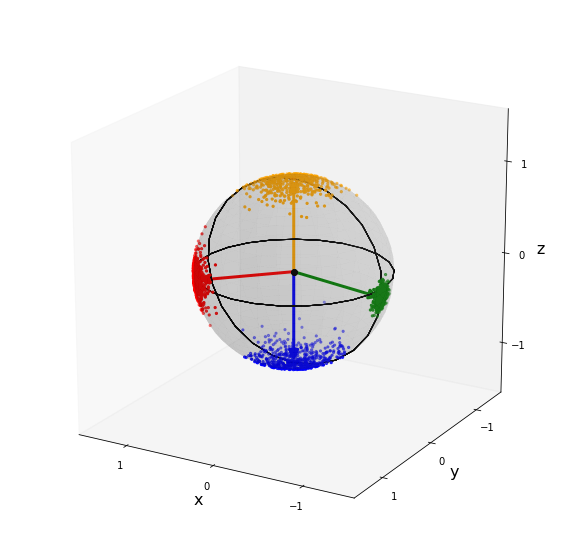

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set 1
plot_3d_scatter(data1,ax)
plot_arrow(mu1,ax,colour="red")

# Set 2 
plot_3d_scatter(data2,ax,colour='orange')
plot_arrow(mu2,ax,colour="orange")

# Set 3
plot_3d_scatter(data3,ax,colour='blue')
plot_arrow(mu3,ax,colour="blue")

# Set 4 
plot_3d_scatter(data4,ax,colour='green')
plot_arrow(mu4,ax,colour="green")

# Labels 
ax.set_xlabel('x',fontsize=fs)
ax.set_ylabel('y',fontsize=fs)
ax.set_zlabel('z',fontsize=fs)

# Viewing angle
ax.view_init(20,120)

# Save it
plt.savefig("vmf-sphere-p-3-scatter-w-arrows.png")

## References 


[1] Mardia, K.V. and Jupp, P.E., Directional Statistics. John Wiley & Sons, London (2000).

[2] Ulrich, G., Computer Generation of Distributions on the $m$-sphere, Appl. Statist. 33, No. 2. pp. 158-163, (1984). 

[3] Wood, A. T. A., Simulation of the von mises fisher distribution, Communications in Statistics - Simulation and Computation, 23 , 157-164 (1994).

[4]  <https://mathworld.wolfram.com/SpherePointPicking.html>

[5] Muller, M. E. "A Note on a Method for Generating Points Uniformly on N-Dimensional Spheres."
    Comm. Assoc. Comput. Mach. 2, 19-20, Apr. (1959).

[6] Hornik, Kurt and Grün, Bettina, movMF: An R Package for Fitting Mixtures of von Mises-Fisher Distributions, Journal of Statistical Software, 58 (10), pp. 1-31 (2014).

[7] Drawing a fancy vector see <https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector-in-matplotlib>

    


